Bootstrapping Resampling
- if you have real data, you don't have a generating function for doing multiple experimental runs like we did with the exercise last class
- assume that the data you have is the generating function
- resample N points from the N points that you have, but with replacement
- then can fit the model to each of those new data sets and create distributions of the parameters

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def f(x,m=1,b=0):
    return m*x+b

In [13]:
f_vec=np.vectorize(f)

In [20]:
numpoints=50
Xs=np.random.rand(numpoints)
Ys=f_vec(Xs)
y_sigma=0.2
Ys=Ys+np.random.normal(scale=y_sigma,size=numpoints)

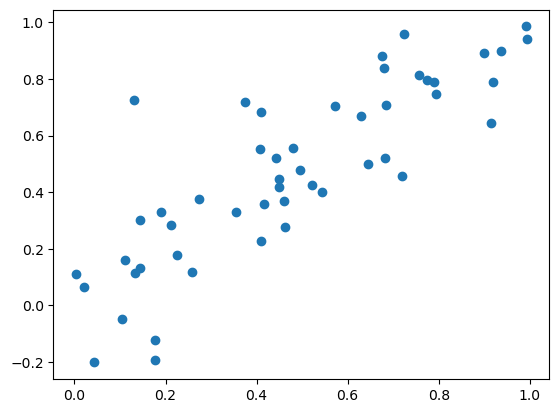

In [23]:
plt.scatter(Xs,Ys)

Could also use np.random.choice if the X and Y arrays were already paired together so it would select (x,y) points and they wouldn't get decoupled.

In [42]:
def get_params(Xs,Ys):
    choices=np.random.randint(0,len(Xs),size=len(Xs)) #generates indices
    newX=np.take(Xs,choices) #grabs the values at those indices
    newY=np.take(Ys,choices)
    params, error_matrix=np.polyfit(newX,newY,deg=1,w=1/(y_sigma*np.ones(numpoints)),cov=True)
    return params

In [46]:
numruns=300
params=np.zeros((numruns,2))
diffs=np.zeros((numruns,2))

In [49]:
for i in range(numruns):
    params[i,:]=get_params(Xs,Ys)
    diffs[i,:]=np.array([1,0])-params[i,:]

(array([ 5., 11., 22., 57., 55., 73., 44., 24.,  8.,  1.]),
 array([-0.19828557, -0.1434529 , -0.08862024, -0.03378758,  0.02104509,
         0.07587775,  0.13071041,  0.18554308,  0.24037574,  0.2952084 ,
         0.35004107]),
 <BarContainer object of 10 artists>)

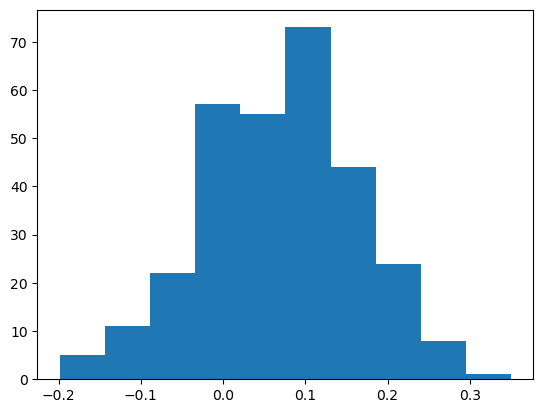

In [52]:
plt.hist(diffs[:,0])

(array([ 3., 13., 35., 50., 53., 63., 51., 24.,  5.,  3.]),
 array([-0.19334573, -0.15993227, -0.1265188 , -0.09310534, -0.05969187,
        -0.02627841,  0.00713506,  0.04054852,  0.07396199,  0.10737545,
         0.14078892]),
 <BarContainer object of 10 artists>)

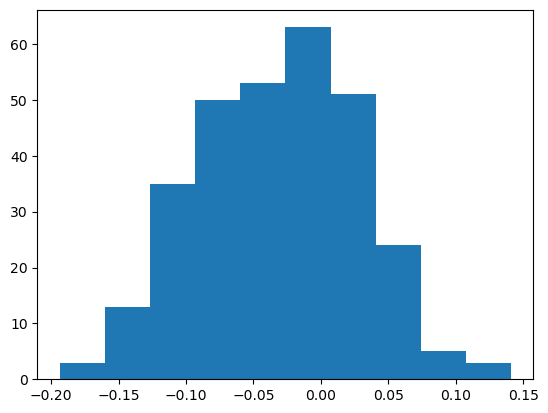

In [55]:
plt.hist(diffs[:,1])

Jackknife Resampling
- remove a random data point
- calculate statistics
- repeat for each point in the data set
- this is a bit excessive if you have a lot of points
- useful when there are correlations in the data
- could remove groups of similar data at a time

Non-Gaussian errors:
- could include the non-Gaussianity in the generative model if you have a theory of what type of error it should be
- could use a mixture of k Gaussian distributions, because most reasonable error distributions can be approximated as the sum of Gaussian distributions
- doing the minimization of the objective function is harder since we can't just use linear algebra anymore

Goodness of fit:
- if assumptions of the generative model are correct (see slides for assumptions), then the data points should contribute a mean square error comparable to sigma squared. if the chi-squared value is over or under the expected value (see slides), that suggests that the model is incorrect.
- common issue is that things aren't actually independent and there is covariance
- could define chi-squared in terms of a covariance matrix to address this
- in real world situations, have to consider error on the x-variables too
- a way of measuring 2D uncertainty is looking at the perpendicular distance from the line (instead of the distance along y) and using that for estimating error and for doing the fitting

Nonlinear least-squares:
- can use the linear method not just for a line, but for any linear function
- but if it's not linear at all, most of the analysis is the same, but can't use chi-squared as the objective function or the same minimzation routine
- Gauss-Newton algorithm: extension of Newton's method for finding the minimum of a function
- Gradient descent: another minimization method that works for any function
- both methods only find a local minimum
- Levenberg-Marquardt algorithm:
    - combines both methods by introducing a damping parameter
    - standard method for solving nonlinear least square problems
    - can adapt the parameter for each iteration
    - when the parameter is small, method is like Gauss-Newton, and if it's large, it's like gradient descent
    - this is what the scipy curve_fit function in the optimize subpackage uses
    - see slides for how to use the function

General minimization:
- lots of algorithms for this
- important differences include if they use derivatives, if they use just first or also second derivatives, and how much effort they spend looking for global vs local minima
- Powell's method:
    - extension of our 1D methods for finding local minima in higher dimensional spaces
    - use bisection to find the the minimum in one of the dimensions and do the same thing stepping through the rest of the N-1 dimensions and keep reapeating until going through all the N dimensions improves your result by less than set tolerance
    - requires no derivatives
    - can modify it to use other means of finding the minimum in one dimension
- Conjugate method:
    - similar, but instead of reorienting along a dimension, reorient along the steepest gradient
- BFGS method:
    - default in scipy
    - quasi-Newton method analagous to secant method but in higher dimensional space
    - just root finding on the gradient of the function, so involves the Jacobian of the gradient (called the Hessian matrix)
- Ameoba (or Nelder-Mead) method:
    - downhill simplex method
    - doesn't require derivatives
    - uses a simplex - polytope of n+1 vertices in n dimesnions
    - evaluates things at the vertices, then rotate it around to find the lower direction. it shrinks over time.
    - helps avoid local minima because ideally the simplex flips over them
- Global search
    - start the process in many different locations and then compare the local minima that it finds
    - could do a grid search
    - could also do a Monte-Carlo Markov-Chain to sample the space - also useful for calculating confidence levels
    - simulated annealing - MCMC but also shrinking over time with a cooling function that determines the rate at which the search becomes more localized
    - genetic or evolutionary algorithms
    - pretty much all of this is in scipy although there is also a separate package called emcee for MCMC